In [1]:
import tensor3
import poisson
import ondas
import matrizes
import laplace
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from math import ceil, floor
from copy import deepcopy
# %matplotlib widget


# un = UnitRegistry()

tamanho_mark = 1
tamanho_plot = (7, 7)


In [2]:
L = 1.0  # m
c = 0.2  # 300.0  # m/s
dx = 0.01  # m
dt = dx / c
I = int(L / dx)

t_f = 2 * L / c

x0 = 0.3  # m
k = 1000  # m^-2

x = np.linspace(0, L, I)
# y0 = list(np.exp(- k * (x - x0)**2))
y0 = np.exp(- k * (x - x0)**2)
y0[0] = 0.0
y0[-1] = 0.0

In [3]:
# r = c * dt / dx

# i_max = np.size(y0)  # 100
# n_max = int(t_f / dt)  # 200

# y_xt = np.zeros((i_max, n_max))

# y_xt[:, 0] = y0
# # matrizes.mprint(y_xt)


# y_in = np.zeros(i_max)
# print(y_in)

# # for i in range(1, i_max - 1):
# #     y_in += 2 * (1 - r**2) * y_xt[i, 0] - y0[i] + r**2 * (y_xt[i + 1, 0] + y_xt[i - 1, 0])




In [4]:
y = ondas.propagate(
    y_x0=y0,
    t_f=t_f,
    dx=dx,
    c=c,
    pe='fixa',
    pd='solta'
)

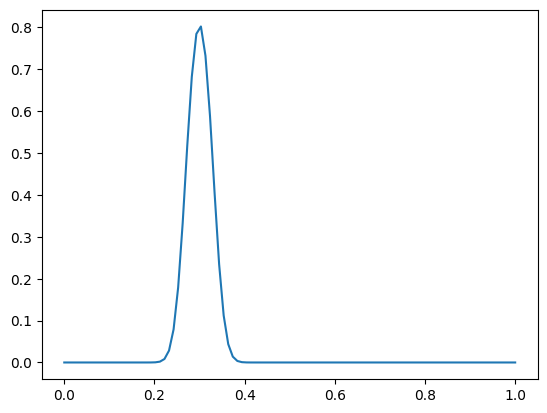

In [5]:
plt.plot(x, y[:, 1])
plt.show()

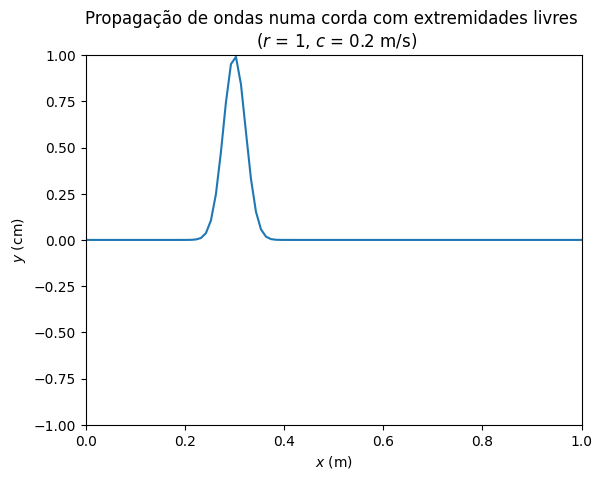

In [6]:
# N = len(y)
N = np.shape(y)[1]

fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_title('Propagação de ondas numa corda com extremidades livres \n ($r$ = 1, $c$ = 0.2 m/s)')
ax.set_xlabel('$x$ (m)')
ax.set_ylabel('$y$ (cm)')

line, = ax.plot(x, y[:,0])


def ondas_1(i):
    line.set_ydata(y[:,i])
    return line,


ani = animation.FuncAnimation(
    fig=fig,
    func=ondas_1,
    frames=N,
    interval=dt * 1000,
    blit=True,
    repeat=True
)

plt.show()


In [7]:
ani.save('teste.mp4')